Matrix([[-B_*Ts_/(J_**2*(B_*R_/(J_*L_) + TF_**2/(J_*L_))) + TF_*Vs_/(J_*L_*(B_*R_/(J_*L_) + TF_**2/(J_*L_)))], [R_*Vs_/(L_**2*(B_*R_/(J_*L_) + TF_**2/(J_*L_))) + TF_*Ts_/(J_*L_*(B_*R_/(J_*L_) + TF_**2/(J_*L_)))]])
dict_keys([-(B_*L_ + J_*R_)/(2*J_*L_) - sqrt(B_**2*L_**2 - 2*B_*J_*L_*R_ + J_**2*R_**2 - 4*J_*L_*TF_**2)/(2*J_*L_), -(B_*L_ + J_*R_)/(2*J_*L_) + sqrt(B_**2*L_**2 - 2*B_*J_*L_*R_ + J_**2*R_**2 - 4*J_*L_*TF_**2)/(2*J_*L_)])


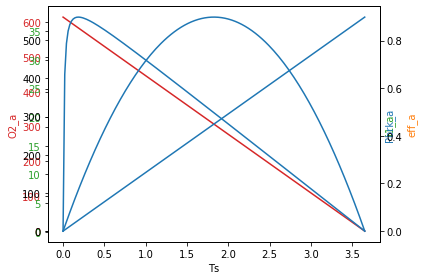

In [4]:
#04.05.2
import sympy as s
import numpy as n
import matplotlib.pyplot as plt
Kt_spec = 13.7;
Kv_spec = 10.2;
Tmax_spec = 2.82;
Omax_spec = 628;
N_oz = 0.278013851;
m_in = 0.0254;
Kt_si = Kt_spec*N_oz*m_in;
rads_krpm = 1e3*2*n.pi/60;
Kv_si = Kv_spec/rads_krpm;
Jm = 56.5e-6;
Bm = 16.9e-6;
R = 1.6;
L = 4.1e-3;
TF = Kv_si;
B_=s.Symbol('B_')
J_=s.Symbol('J_')
TF_=s.Symbol('TF_')
L_=s.Symbol('L_')
R_=s.Symbol('R_')
Vs_=s.Symbol('Vs_')
Ts_=s.Symbol('Ts_')
a_=s.Matrix([[-B_/J_,TF_/J_],[-TF_/L_,-R_/L_]])
#A=s.Matrix([[1,2],[3,4]])
b_=s.Matrix([[0,-1/J_],[1/L_,0]])
u_=s.Matrix([[Vs_],[Ts_]])
M1_=-b_*a_.inv()
den_=TF_*TF_+B_*R_;
M2_=M1_*den_
xs_=M1_*u_
xs_2_=M2_*u_;
print(xs_)
print(a_.eigenvals().keys())
Vs=60
Tmax=TF/R*Vs
Ts_a=n.linspace(0,Tmax,180)
O2_a=1/(TF*TF+Bm*R)*(TF*Vs-R*Ts_a) #data
il_a=1/(TF*TF+Bm*R)*(Bm*Vs+TF*Ts_a) # data
Pbrk_a=Ts_a*O2_a #data
eff_a=Pbrk_a/(il_a*Vs)# data
color="tab:red"
fig, ax1=plt.subplots()
ax1.set_xlabel('Ts')
ax1.set_ylabel('O2_a',color=color)
ax1.plot(Ts_a,O2_a,color=color)
ax1.tick_params(axis='y',labelcolor=color)
color="tab:green"
ax2=ax1.twinx()
ax2.set_ylabel('i1_a',color=color)
ax2.plot(Ts_a,i1_a)
ax2.tick_params(axis='y',labelcolor=color)
color="tab:blue"
ax3=ax2.twinx()
ax3.set_ylabel('Pbrk_a',color=color)
ax3.plot(Ts_a,Pbrk_a)
color="tab:orange"
ax4=ax3.twinx()
ax4.set_ylabel('eff_a',color=color)
ax4.plot(Ts_a,eff_a)
fig.tight_layout()
plt.show()

In [6]:
Omax=O2_a[0]
print(Omax)
print(Tmax)

614.2478776170121
3.6526059439589975


In [13]:
print(Omax_spec)
print(Tmax_spec)
print('percent error for speed: '+str(((Omax-Omax_spec)/Omax_spec)*100))
print('percent error for speed: '+str(((Tmax-Tmax_spec)/Tmax_spec)*100))

628
2.82
percent error for speed: -2.189828404934373
percent error for speed: 29.525033473723322
